In [1]:
library(ggplot2)

In [2]:
a <- c(0.051, 0.058,0.072,0.012, 0.079)
ystart <- c(6.5, 6.75, 7.5, 18, 7.25)
yend <-  c(8.5, 8.75, 9.5, 20, 9.25)
vlines <- data.frame(xstart = a, xend=a, ystart=ystart, yend =yend, grp = c("Miscanthus vs Miscanthus", "Miscanthus vs Saccharum", "Miscanthus vs Sorghum", 
                                       "Saccharum vs Saccharum", "Saccharum vs Sorghum"))
vlines

xstart,xend,ystart,yend,grp
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.051,0.051,6.50,8.50,Miscanthus vs Miscanthus
0.058,0.058,6.75,8.75,Miscanthus vs Saccharum
0.072,0.072,7.50,9.50,Miscanthus vs Sorghum
0.012,0.012,18.00,20.00,Saccharum vs Saccharum
0.079,0.079,7.25,9.25,Saccharum vs Sorghum


Warning message:
“Removed 6554 rows containing non-finite values (stat_density).”


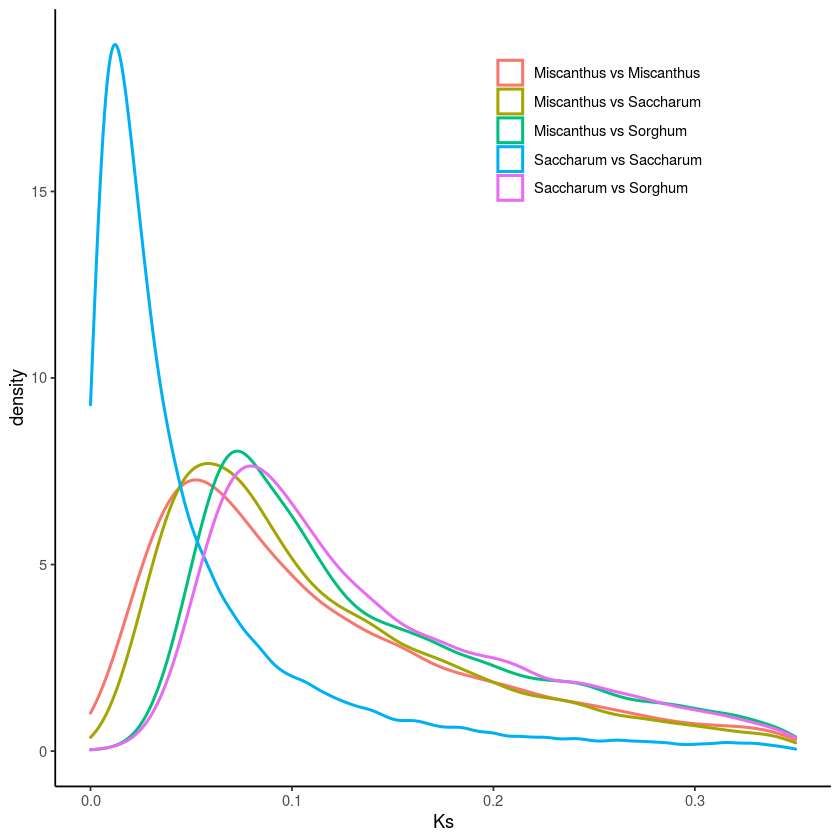

In [3]:
df1 <- read.csv("all_Kvalues", sep="\t")
p1 <- ggplot(data=df1, aes(x=Ks, color=SP))
p2 <- p1  + geom_density(size=0.85)  + xlim(0, 0.35) + theme_bw() + theme(legend.text.align=0, legend.position=c(.7, .85), legend.title=element_blank(), panel.border = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),axis.line = element_line(colour = "black"))
### legend.text.align,设定了图例文字的对齐方式, 0为左对齐，0.5为中间对其，1为右对齐
### legend.position 设定了图例的放置位置，整个画布从(0,0)到（1，1）
### legend.title 设定为没有
p2

In [4]:
label1 <- expression(paste(italic(M), ". ", italic(floridulus), " vs ", italic(M), ". ", italic(floridulus)))
label2 <- expression(paste(italic(M), ". ", italic(floridulus), " vs ", italic(S), ". ", italic(spontaneum)))
label3 <- expression(paste(italic(M), ". ", italic(floridulus), " vs ", italic(S), ". ", italic("bicolor")))
label4 <- expression(paste(italic(S), ". ", italic(spontaneum), " vs ", italic(S), ". ", italic(spontaneum)))
label5 <- expression(paste(italic(S), ". ", italic(spontaneum), " vs ", italic(S), ". ", italic("bicolor")))

### 在一句话中既有斜体也有正体

Warning message:
“Removed 6554 rows containing non-finite values (stat_density).”


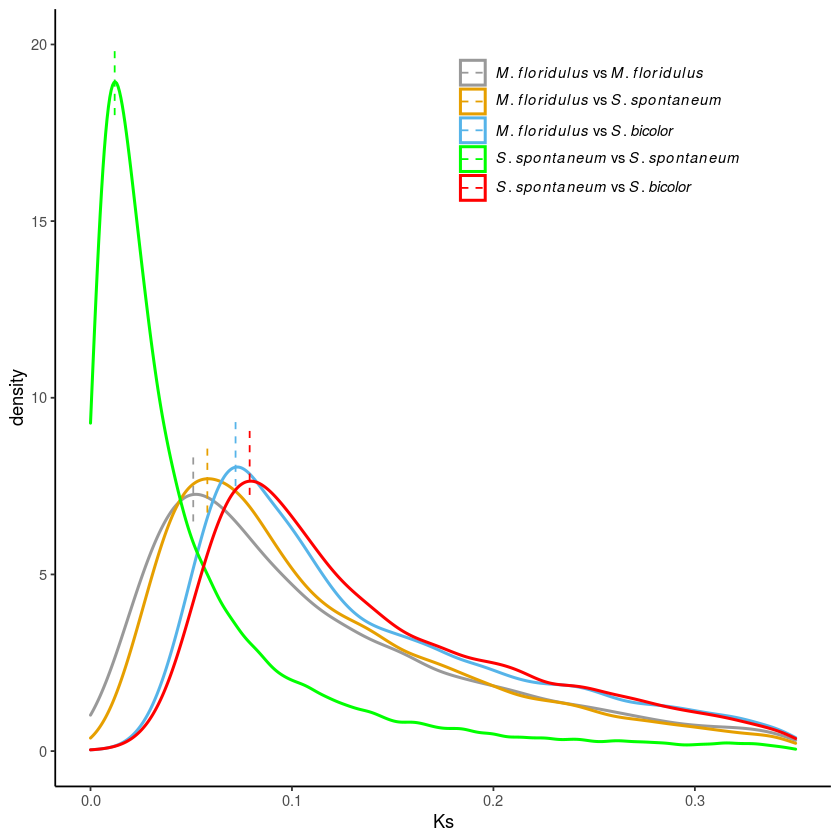

In [5]:
p2 + geom_segment(data=vlines, aes(x=xstart, xend=xend, y=ystart, yend=yend, colour=grp),linetype="dashed") +
scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9","green", "red"), 
                     labels=c(label1, label2, label3, label4, label5)) 

### 此处的geom_segment 与geom_vline有所区别
### 此处的scale_color_manual是对图例的修改再修改
### coord_fixed是对横坐标和纵坐标比例的修改

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 613 rows containing non-finite values (stat_density).”


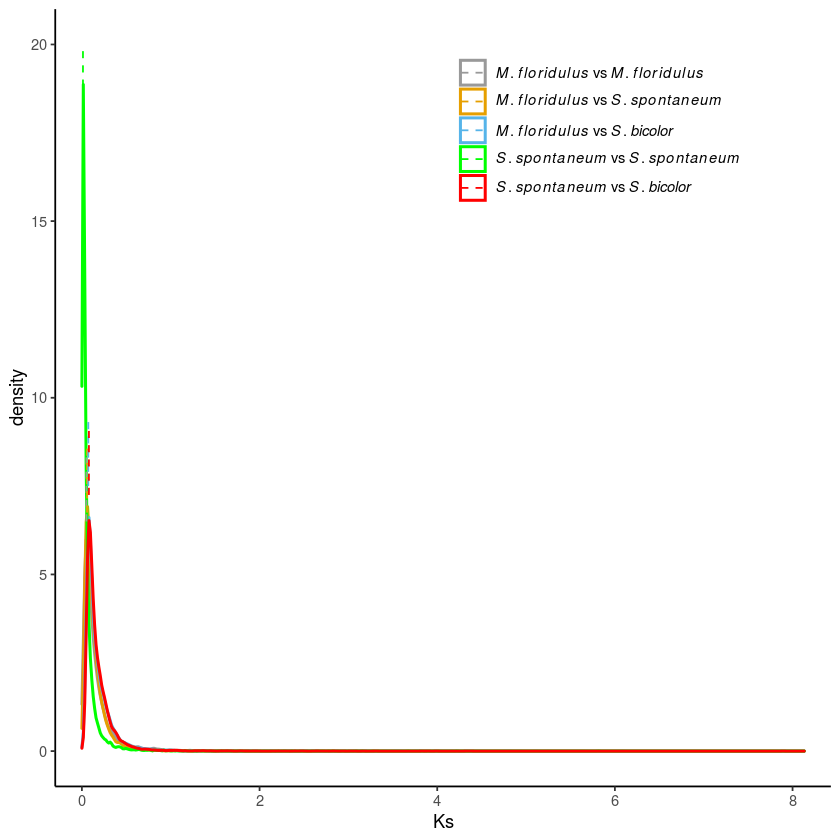

In [26]:
p2 + geom_segment(data=vlines, aes(x=xstart, xend=xend, y=ystart, yend=yend, colour=grp),linetype="dashed") +
scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9","green", "red"), 
                     labels=c(label1, label2, label3, label4, label5))  + scale_x_continuous(expand = c(0, 0.30))

### 此处报错了, 注意。因为xlim 和 scale_x_continuous不能同时应用

In [23]:
?draw_key

Warning message:
“Removed 613 rows containing non-finite values (stat_density).”


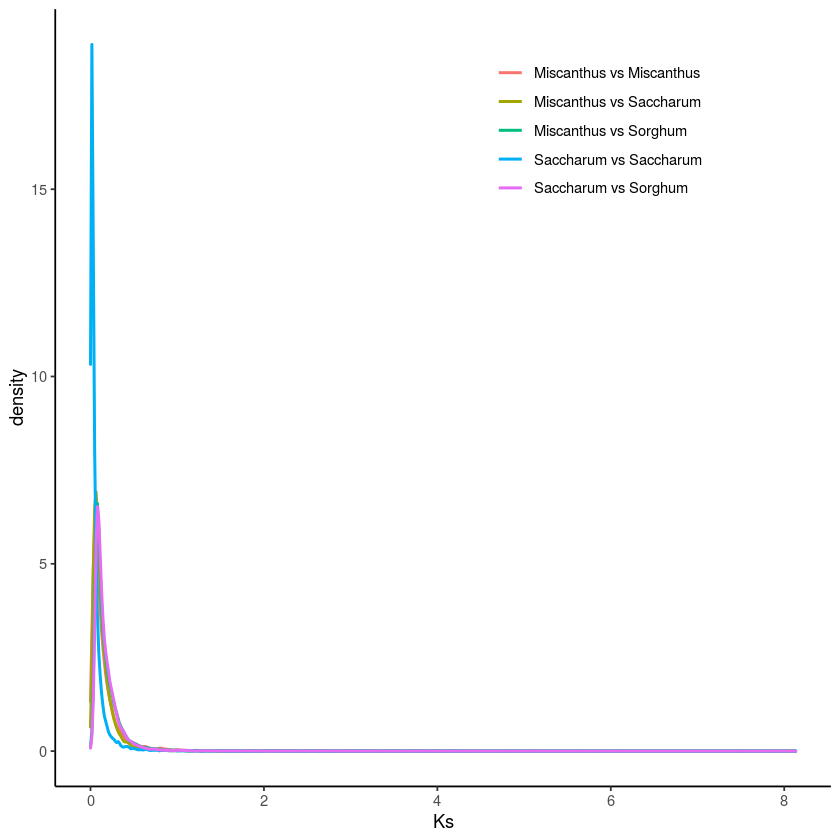

In [6]:
p3 <- p1  + geom_density(size=0.85, key_glyph=draw_key_smooth) + theme_bw() + theme(legend.text.align=0, legend.position=c(.7, .85), legend.title=element_blank(), panel.border = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),axis.line = element_line(colour = "black"))
p_temp <- p3 + guides(shape = "linetype")
p_temp

Warning message:
“Removed 6554 rows containing non-finite values (stat_density).”


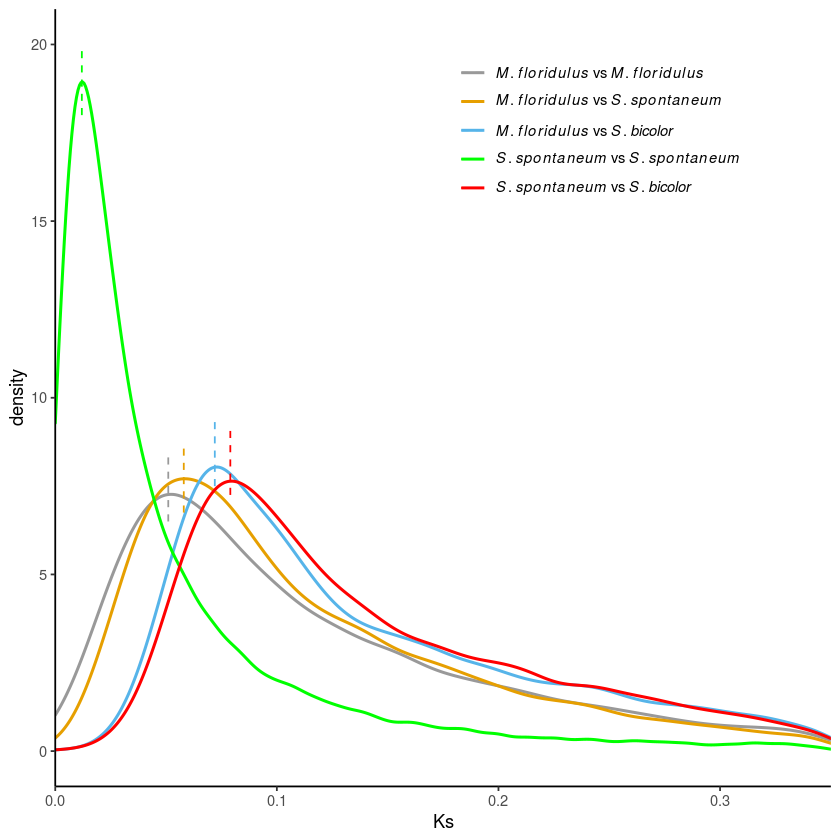

In [7]:
p3  + geom_segment(data=vlines, aes(x=xstart, xend=xend, y=ystart, yend=yend, colour=grp),linetype="dashed") +
scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9","green", "red"), 
                     labels=c(label1, label2, label3, label4, label5)) +  scale_x_continuous(limits=c(0, 0.35),expand = c(0, 0.0))

### 这样设置的不是很好看

Warning message:
“Removed 6183 rows containing non-finite values (stat_density).”


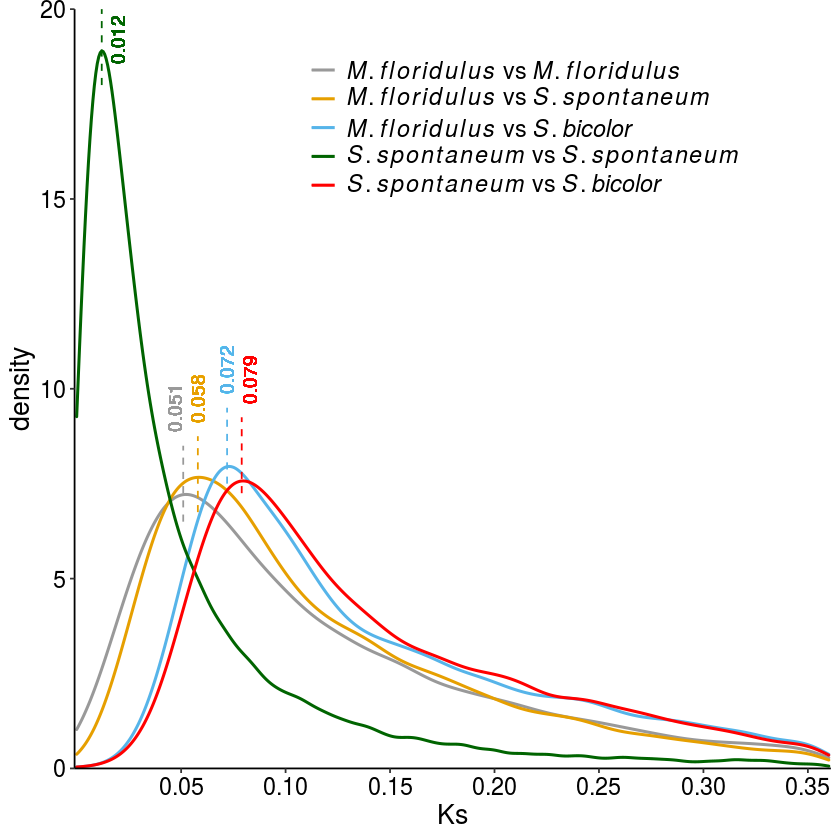

In [8]:
p_final <- p3  + geom_segment(data=vlines, aes(x=xstart, xend=xend, y=ystart, yend=yend, colour=grp),linetype="dashed") +
scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9","darkgreen", "red"), 
                     labels=c(label1, label2, label3, label4, label5)) +  scale_x_continuous(limits=c(0, 0.36),expand = c(0, 0.001), 
                                                                                             breaks=c(0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35)) +
scale_y_continuous(expand = c(0,0)) + 
theme(axis.text.x = element_text(size=14, color="black"), axis.title.x = element_text(size=16, color="black"), axis.text.y = element_text(size=14, color="black"), axis.title.y = element_text(size=16,color="black"),
     legend.text = element_text(size=14), legend.position = c(0.6,0.85)) + geom_text(aes(x=0.020, y= 19+0.2,label="0.012"),color="darkgreen", size=4, angle=90) + 
geom_text(aes(x=0.047, y= 9.5,label="0.051"),color="#999999", size=4, angle=90) +
geom_text(aes(x=0.058, y= 9.75,label="0.058"),color="#E69F00", size=4, angle=90) +
geom_text(aes(x=0.072, y= 10.5,label="0.072"),color="#56B4E9", size=4, angle=90) + 
geom_text(aes(x=0.083, y= 10.25,label="0.079"),color="red", size=4, angle=90)
### 注意，设置了scale_x_continuous中的limits是x轴的范围，expand是为了确定图形和横坐标轴的距离，breaks是刻度线
### 而这里面的theme改变了坐标轴标题和坐标轴标签文字的各种显示效果，；另外如果改变内容的话，则需要用 xlab, ylab和scale_x_continuous中
### 的labels和breaks
p_final

In [41]:
ggsave("AllvsAll_Ks_new_2021.png", p_final, width = 6, height = 6)

Warning message:
“Removed 6183 rows containing non-finite values (stat_density).”


In [9]:
ggsave("AllvsAll_Ks_new_2021_2.pdf", p_final, width = 6, height = 6)

Warning message:
“Removed 6183 rows containing non-finite values (stat_density).”
